## Getting the data!

In [95]:
import os
import tarfile
import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
    
fetch_housing_data()

In [96]:
import pandas as pd
import numpy as np

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

housing = load_housing_data()

## Ways to visualize the data

In [97]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [98]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [99]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [100]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


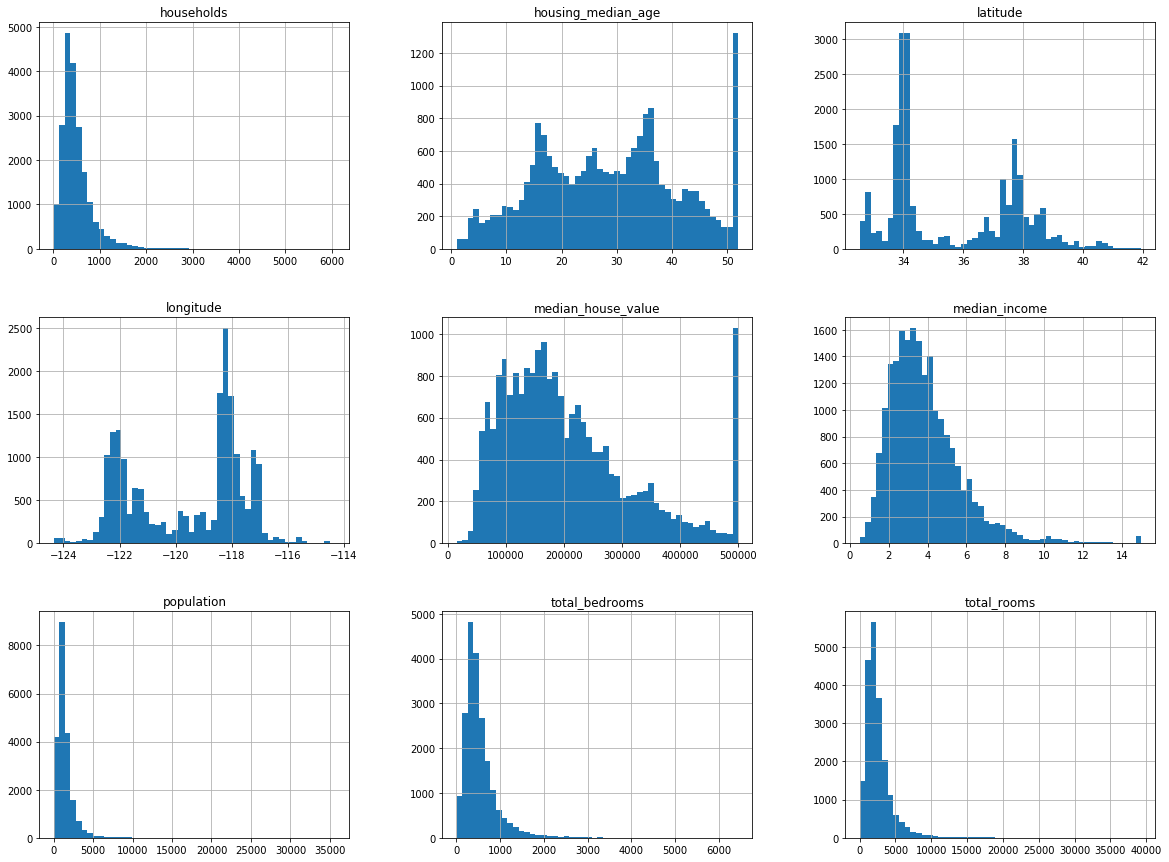

In [101]:
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
# bins are the number of bars you will use to show the data
# figsize defines how big each box will be for graph
# save_fig("attribute_history_gram") this is used in the source code but not mine
plt.show()

[click here to know about loc and iloc](https://repl.it/@shanemmay/mlpractice)

In [102]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32
# this just gives you a test set regardless of you dataset changing
# i also have no clue how this works... how did i get into google?
def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_ : test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]
# so this basically uses the test_set_check to get a test set
# then the training set and the test set are returned

### getting a training and test set

In [103]:
housing_with_id = housing.reset_index()
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, 'index')

### creating a unique id

In [104]:
housing_with_id['id'] = housing['longitude'] * 1000 + housing['latitude']
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, 'id')
# this is creating a unique id
# by adding the 2 columns longitude and latitude together
# since when you add numpy arrays together, it adds all the values together

### splitting data with Scikit

In [105]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

### Stratified Sampling
Making sure your data is representative of the populations 
by grouping.

This is done by making groups called *stratas*. Then making sure these groups are in ratios that represent the population.

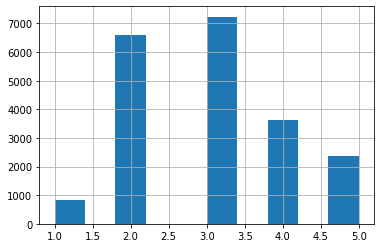

In [106]:
housing['income_cat'] = pd.cut(housing['median_income'],
                                bins=[0.0, 1.5, 3.0, 4.5, 6.0, np.inf],
                                labels=[1, 2, 3, 4, 5])
housing['income_cat'].hist()
# this creates stratas (groups) of median incomes and shows us the groups

### Stratified Sampling with Scikit

In [107]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]
strat_test_set['income_cat'].value_counts() / len(strat_test_set)
# here we are just using sci-kit's stratified sample

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [108]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop('income_cat', axis=1, inplace=True)
# not sure why we are doing this but the book says to do it

## Discover and visualize data to get insights

In [109]:
housing = strat_train_set.copy()
# making a copy of our training set (not test set) so we don't mess anything up

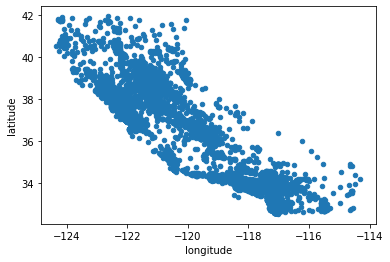

In [110]:
# you can make a simple scatter plot to visualize data
housing.plot(kind="scatter", x='longitude', y='latitude')

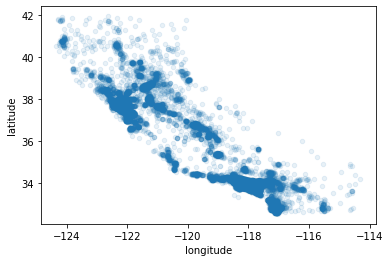

In [111]:
# here we are just making the circles a little more transparent to see how dense some areas are
housing.plot(kind="scatter", x='longitude', y='latitude', alpha=0.1)

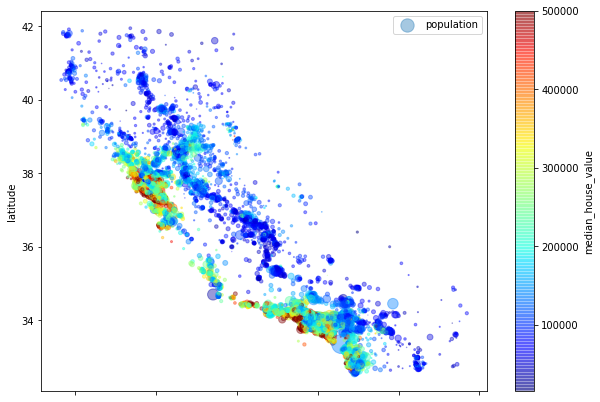

In [112]:
# now we will include color coding to show housing prices too
# s is the radius of the circles showing district population
# c is the price
housing.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4,
            s=housing['population']/100, label='population', figsize=(10,7),
            c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True)
plt.legend()

### Correlations
Pearson's r

In [117]:
corr_matrix = housing.corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105848,0.048871,0.076598,0.108030,0.063070,-0.019583,-0.047432
latitude,-0.924478,1.000000,0.005766,-0.039184,-0.072419,-0.115222,-0.077647,-0.075205,-0.142724
housing_median_age,-0.105848,0.005766,1.000000,-0.364509,-0.325047,-0.298710,-0.306428,-0.111360,0.114110
total_rooms,0.048871,-0.039184,-0.364509,1.000000,0.929379,0.855109,0.918392,0.200087,0.135097
total_bedrooms,0.076598,-0.072419,-0.325047,0.929379,1.000000,0.876320,0.980170,-0.009740,0.047689
population,0.108030,-0.115222,-0.298710,0.855109,0.876320,1.000000,0.904637,0.002380,-0.026920
households,0.063070,-0.077647,-0.306428,0.918392,0.980170,0.904637,1.000000,0.010781,0.064506
median_income,-0.019583,-0.075205,-0.111360,0.200087,-0.009740,0.002380,0.010781,1.000000,0.687160
median_house_value,-0.047432,-0.142724,0.114110,0.135097,0.047689,-0.026920,0.064506,0.687160,1.000000


In [118]:
# looking at how the other numberic features relate to median_house_value
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a25c07210>,
      dtype=object)

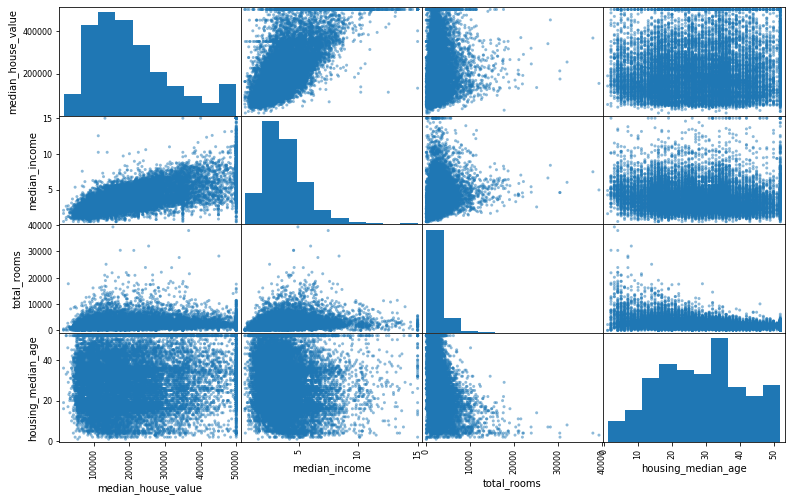

In [119]:
# graphing the strongest corr coeff with scatter_matrix()
from pandas.plotting import scatter_matrix
attributes = ['median_house_value','median_income','total_rooms','housing_median_age']
scatter_matrix(housing[attributes], figsize=(13, 8))

### Feature Engineering! Making new features!

In [120]:
housing['rooms_per_household'] = housing['total_rooms'] / housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms'] / housing['total_rooms'] # this is looking at the number of bedrooms per other type of room in a house
housing['population_per_household'] = housing['population'] / housing['households']

# now we'll recreact our correlation coefficient matrix and see what we find
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

## Cleaning the Data!

In [121]:
# creating a df without the answers
housing = strat_train_set.drop('median_house_value', axis=1)
# creating a copy of the label (answers)
housing_labels = strat_train_set['median_house_value'].copy()

### Handling missing data!
There are 3 ways to deal with missing data
1. Get ride of the whole instance
    - example
    ```python
    housing.dropna(subset=['total_bedrooms'])
    ```
2. Get ride of the whole feature
    - example
    ```python
    housing.drop('total_bedrooms', axis=1)
    ```
3. Fill in the missing values with something like the median
    - example
    ```python
    median = housing['total_bedrooms'].median()
    housing['total_bedrooms'].fillna(meidan, inplace=True)
    ```

! Alternatively you can do this with a SciKit Imputer.
I did not read the scikit section on page 64, so make sure you do that later. !

In [122]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
# making and imputer and telling it to replace missing values with the median
housing_num = housing.select_dtypes(include=[np.number])
# text attribute break imputers, so we have to take it out
# here we are selecting the numberic types
imputer.fit(housing_num)
# median is also saved in the imputer's statistics_ variable
print(imputer.statistics_ == housing_num.median().values)
X = imputer.transform(housing_num)
# here is where the magic happens and the missing numberic values are replaced with the median
housing_tr = pd.DataFrame(X, columns = housing_num.columns, index=housing_num.index)
# making a dataframe without any missing values

[ True  True  True  True  True  True  True  True]


### Handling Categorical Data!
FYI
```python
housing['ocean_proximity'] # this returns all of the values in the 'ocean_proximity' column
housing[['ocean_proximity']] # and this returns the actual 'ocean_proximity' column
```
ML algorithms generally only like to deal with numbers, so we need to change out text into numbers.
Ways to turn categorical data into numberic.
1. scikit's Ordinal Encoder
    - Ordinal Encoder will put the unique categories into a list ['red','yellow','green']. Then replace the values with they're index. So reds will be 0, and yellows will be 1, etc. 
    - Ordinal Encoder stores the unique categories in a variable called *categories_*
    - Downside: ML algorithm will assume that 0 and 1 are simular because the numbers are close together. This is true when you are dealing with categories like [A, B, C, D, F] or [horrible, bad, okay, good, great], however; this is bad is youre deaming with something like [inland, island, near ocean] where the values next to eachother are not simular.
2. scikit's OneHotEncoder
    - OneHotEncoder is where one value is 1 and the rest are 0
    - Example: red would be 1,0,0. yellow would be 0,1,0. and green would be 0,0,1. 
If there are too many categories to do either of the options above, then find a way to turn them into numbers. For instance, you can change the types of ocean_proximity to numbers. So island can be 100 and inland can be 200, etc.

In [123]:
# getting categorical data
housing_cat = housing[['ocean_proximity']]

In [124]:
# OrdinalEncoder Example
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoder = ordinal_encoder.fit_transform(housing_cat)
# housing_cat_encoder
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [125]:
# OneHotEncoder Example
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit(housing_cat)
# housing_cat_1hot
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

! I don't get the *Custom Transformers* section on page 68. So figure that out when you can. !